# Understanding Descriptive Statistics

Import the necessary libraries here:

In [7]:
# Libraries
import random
import pandas as pd
import matplotlib as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [23]:
# your code here
res = [random.randint(1,6) for i in range(10)]
res

[1, 5, 1, 1, 5, 3, 2, 5, 6, 4]

#### 2.- Plot the results sorted by value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12172a0d0>]],
      dtype=object)

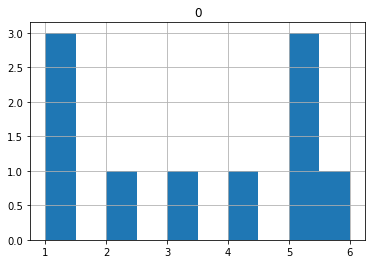

In [26]:
# your code here
res.sort()
df = pd.DataFrame(res)
df.hist()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

5    3
1    3
6    1
4    1
3    1
2    1
Name: 0, dtype: int64


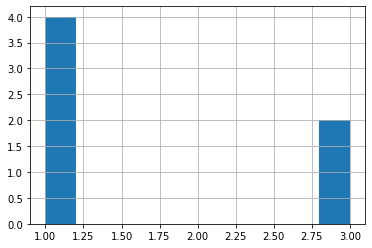

In [30]:
# your code here
c = df[0].value_counts()
c.hist()
print(c)

In [ ]:
"""
your comments here
--
the first one represent single values
the second one represents how many times each value appears. In this case we have two values that appear 3 times and 4 values that apear 1 time
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [31]:
# your code here
def calc_mean(lst):
    return sum(lst) / len(lst)
calc_mean(res)

3.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [66]:
# your code here
def calc_freq_mean(lst):
    res = {}
    for i in lst:
        count = 0
        for j in lst:
            if i == j:
                count += 1
        res[i] = count
    
    return sum(res.values()) / len(res)

print(calc_freq_mean(res))

1.6666666666666667


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [46]:
# your code here
def calc_median(lst):
    if len(lst) % 2 != 0:
        return lst[int(len(lst) / 2)]
    else:
        pos = [int(len(lst) / 2 - 1), int(len(lst) / 2)]
        return (lst[pos[0]] + lst[pos[1]]) / 2
calc_median(res)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [51]:
# your code here
def calc_quartiles(lst):
    q2 = calc_median(lst)
    q1 = calc_median(lst[:int(q2)])
    q3 = calc_median(lst[(int(q2) + 1):])
    return lst[0], q1, q2, q3, lst[-1]
    
calc_quartiles(res)

(1, 1, 3.5, 5.0, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

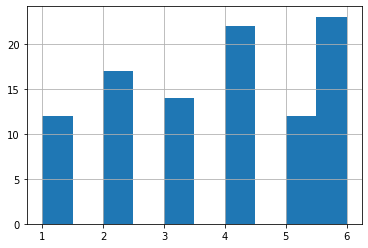

In [74]:
# your code here
csv_dice_res = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col=False)
csv_dice_res = csv_dice_res.sort_values(by="value")
csv_dice_res.value.hist()

In [ ]:
"""
your comments here
the dice has nearly double chance to get a 4 or 6 than 1, 2, 3, 5
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [64]:
# your code here
calc_mean(csv_dice_res.value)

3.74

#### 3.- Now, calculate the frequency distribution.


In [67]:
# your code here
calc_freq_mean(csv_dice_res.value)

16.666666666666668

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

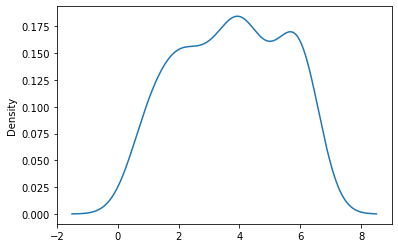

In [79]:
# your code here
csv_dice_res.value.plot.kde()

In [ ]:
"""
your comments here
result distribution is moved to the right side, there are more results over median of possible values than numbers under
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

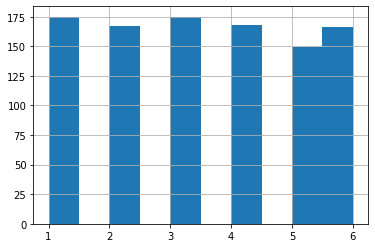

In [83]:
# your code here
csv_dice_res = pd.read_csv('../data/roll_the_dice_thousand.csv', index_col=False)
csv_dice_res = csv_dice_res.sort_values(by="value")
csv_dice_res.value.hist()

In [ ]:
"""
your comments here
results seem more normalized. All values appear nearly the same amount of times
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [88]:
# your code here
age_df = pd.read_csv('../data/ages_population.csv', index_col=False)
age_df.observation.value_counts()

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
70.0     1
71.0     1
7.0      1
69.0     1
73.0     1
Name: observation, Length: 72, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1360ea7d0>]],
      dtype=object)

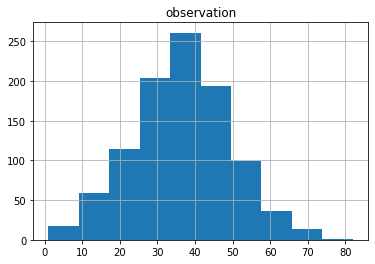

In [89]:
age_df.hist()

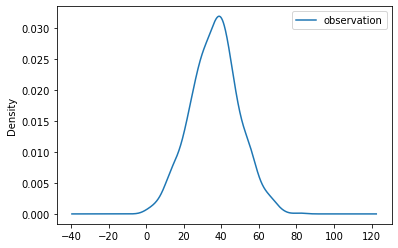

In [91]:
age_df.plot.kde()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [94]:
# your code here
print('mean:', age_df.observation.mean())
print('std:', age_df.observation.std())

mean: 36.56
std: 12.81649962597677


In [ ]:
"""
your comments here
is nearly the same. Thought about a median over 37-38 and min-max of valid range in 25-55
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [98]:
# your code here
age_df2 = pd.read_csv('../data/ages_population2.csv', index_col=False)
age_df2.observation.value_counts()

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13686e150>]],
      dtype=object)

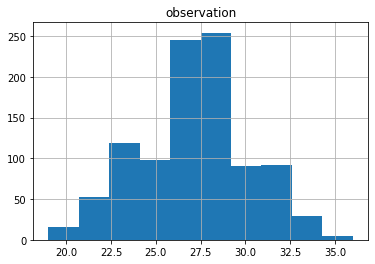

In [99]:
age_df2.hist()

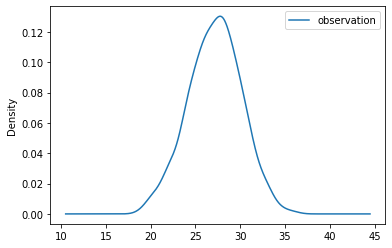

In [100]:
age_df2.plot.kde()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
age range is so short. In step 1 there was the entire range of ages and in this 2nd there seems to be only young to mid aged people.
Also is not distributed in the same way, they are more concentrated in a short range of ages andthe rest is not scalar, is concentrated in both sides of the main range of ages.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [101]:
# your code here
print('mean:', age_df2.observation.mean())
print('std:', age_df2.observation.std())

mean: 27.155
std: 2.9698139326891835


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""